# Problems Notebook

<p>Computer Infrastructure </p>   <p>Author: Gerry Callaghan</p>

In [1]:
# External packages I use in this project

# dates and times - among other things, I use this package to format dates into strings for that i can append to filenames.
import datetime as dt

# data frames - I use pandas to handle tabular data imported from yFinance's csv file.
import pandas as pd

# need numpy to create two arrays for chats
import numpy as np

# plot graphs - I use matplotlib to plot graphs of the stocks.
import matplotlib.pyplot as plt 

# Yahoo Finance is not part of the cental python repository 
# but is an open-source package available that can be installed via conda-forge.
# This open-source library that provides a reliable, threaded, and pythonic way to download historical market data from Yahoo! Finance.
import yfinance as yf
# I had issues with older versions of yfinance, so I want to confirm the version I'm using. This will also help with debugging if I encounter any issues.
print(yf.__version__)

# There are known issues with yfinance and the default user-agent, so i need to spoof my user-agent
# You can read more about this issue here: https://www.reddit.com/r/learnpython/comments/1kc3miq/yfinance_error_yfratelimiterrortoo_many_requests/
# Details on how requests from the curl_cffi package can be imported can be found here: https://pypi.org/project/curl-cffi/
import curl_cffi.requests as requests
session = requests.Session(impersonate="chrome")

# this is needed to handle file paths
import os

# to read in csv files
import csv 


0.2.66



# Problem 1: Data from yfinance

In [2]:
def get_data():
    """Function to download historical stock data (last 5 days with hourly intervals) for the FAANG stocks from Yahoo Finance using yfinance package,
    and then export the data to a CSV file in the data directory named with the current date and time for uniqueness."""

    # My portfolio of stocks I want to download data is as follows:
    portfolio = ['AAPL', 'AMZN','GOOG', 'META','NFLX']  # FANG stocks
    
    # I will use the yfinance download() function for this purpose.
    # Details of this function can be found here https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html
    # it says the format of the command is as follows:
    # yfinance.download(tickers, start=None, end=None, actions=False, threads=True, ignore_tz=None, group_by='column', auto_adjust=None, 
    # back_adjust=False, repair=False, keepna=False, progress=True, period=None, interval='1d', prepost=False, proxy=<object object>, 
    # rounding=False, timeout=10, session=None, multi_level_index=True) 

    # From URL= "https://algotrading101.com/learn/yfinance-guide/" 5 days is written as '5d' within the download() function, 
    # while I want hourly data, so I set interval='1h' for 1 hour intervals.

    # I download the data from yahoo finance into a dataframe as follows, specifying a five day period (5d) at one hour intervals (1h) 
    df = yf.download(portfolio, period='5d', interval='1h', session=session)

    print(f"{df}")

    # I now print our dataframe out to a CSV file
    # I will use the to_csv funtion, you can read about it here https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

    # Before I export it out, I want to give our csv file a name based on today's date
    # We assign a new variable today equal to the current date and time
    now = dt.datetime.now()

    # I format the date and time of today according to a manner I want
    # more on this can be found here docs.python.org/3/library/datetime.html#format-codes 
    # and docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes
    print(now.strftime("%Y%m%d-%H%M%S"))

    FILENAME = now.strftime('%Y%m%d-%H%M%S')+'.csv'
    # we want to put the csv in a separate folder in the parent directory
    DATADIR = "../data/"
    # the directory and filename concatenated is then the fullpath
    FULLPATH = DATADIR + FILENAME  
    # now to print out to this csv
    print(df.to_csv(FULLPATH))
    

# I'm going to call my function to download the data and export to csv
get_data()

/tmp/ipykernel_23129/847643382.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(portfolio, period='5d', interval='1h', session=session)
[*********************100%***********************]  5 of 5 completed

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-21 14:30:00+00:00  269.850006  216.264999  296.760010  585.119995   
2025-11-21 15:30:00+00:00  270.899994  218.574997  300.329987  587.742676   
2025-11-21 16:30:00+00:00  270.549988  219.639999  296.489990  592.979980   
2025-11-21 17:30:00+00:00  270.980011  218.722000  297.290009  591.625000   
2025-11-21 18:30:00+00:00  272.609985  222.050003  302.660095  597.548584   
2025-11-21 19:30:00+00:00  271.369995  220.184998  299.945007  594.070007   
2025-11-21 20:30:00+00:00  271.489990  220.645004  299.660004  594.469971   
2025-11-24 14:30:00+00:00  273.095001  225.869995  316.879486  611.349976   
2025-11-24 15:30:00+00:00  275.000000  224.949005  314.480011  611.652893   
2025-11-24 16:30:00+00:00  274.850006  224.619995  315.119995  614.239990   

## Problem 2: Plotting the closing prices.

Directory '../plots' already exists.


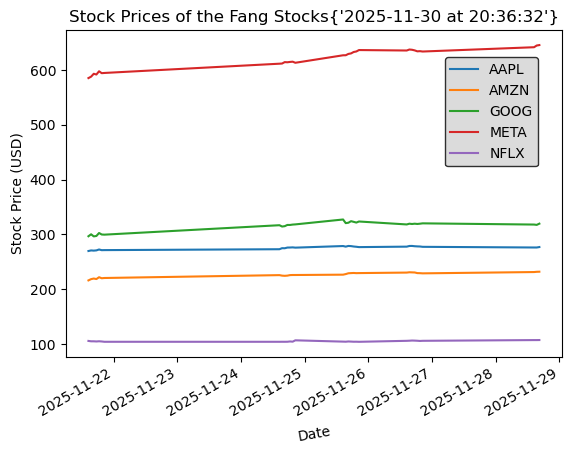

In [3]:
def plot_data():
    """Function to read in the latest csv file from the data directory into a pandas dataframe with multi-level columns,
    and then plot the closing prices for each of the five stocks."""
    
    # For convenience, I want to asign a variable the path and filename so i can reference it below
    # The folder containing the csv files is ../data/
    DATADIR = "../data/"

    # listing files in the data folder
    data_files = os.listdir(DATADIR)

    # sort the list of files in chronological order, latest first
    data_files.sort(reverse=True)

    # the latest file will be the first in the sorted list
    FILENAME = data_files[0]

    # the directory and filename concatenated is then the fullpath
    FULLPATH = DATADIR + FILENAME  

    # When reading in the csv file with multi-level columns, I need to specify header=[0,1] 
    # to indicate that the first two rows are headers (Close, Open, etc on first row and then stock tickers on the second line)
    # I also want to specify index_col=0 to indicate that the first column is the index (dates)
    # more on this can be found here: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
    df= pd.read_csv(FULLPATH, header=[0,1], index_col=0, parse_dates=True)

    # show the first few rows of the dataframe
    #print(f"{df.head()}")
    
    #print(f"{df.index}")
    # I want to confirm that the date column is the index of the dataframe
    # and more importantly that it is in datetime format. 
    # It should be because when inporting the CSV file to the dataframe, I specified parse_dates=True

    # Create new figure and axis objects
    fig, ax = plt.subplots()

    # As covered in lecture 28-all-closing-plots.mkv, I can plot multiple columns of a dataframe directly
    # The first set of square brackets after the dataframe name indicates I am selecting columns
    # The second set of square brackets indicates I am passing in "a list" of the column names I want to plot
    # I could do it like this:
    # df[[("Apple"), ("Amazon"), ("Google"), ("Meta"), ("Netflix")]].plot()                                                          

    # but to avoid hardcoding the column names, I will use the word "Close" and Pandas will show the list of column names continaining that word
    # as all my columns are closing prices, this will get all the columns 

    df['Close'].plot(ax=ax)
    plt.xlabel("Date",rotation=10)
    plt.ylabel("Stock Price (USD)")

    # I want to add the current date and time to the title of my plot
    now = dt.datetime.now()
    title = "Stock Prices of the Fang Stocks" + str({now.strftime('%Y-%m-%d at %H:%M:%S')})
    plt.title(title)

    # I wanted to format the legend to be outside the plot area on the right hand side, 
    # but when i did that, part of the legend was being cut off when I saved the figure as a png file.
    # So, I decided to place the legend inside the plot area at the top right corner
    plt.legend(ncol=1,loc='center left', bbox_to_anchor=(0.75, 0.75),fontsize=10, frameon=True, edgecolor='black', facecolor='lightgray',columnspacing=1.5)

    #plt.show()

    # The two dots .. mean go up one level from the current directory
    # and then the forward slash / means go down into the plots directory
    directory_path = "../plots"

    # from Gemini AI, I will create the directory if it doesn't exist
    try:
        os.mkdir(directory_path)
        print(f"Directory '{directory_path}' created successfully one level up.")
    except FileExistsError:
        print(f"Directory '{directory_path}' already exists.")
    except OSError as e:
        print(f"Error creating directory: {e}")

    # For convenience, I want to asign a variable the path and filename so i can reference it below
    filename = (directory_path) + "/" + now.strftime('%Y%m%d-%H%M%S') + "_stock_prices_of_the_fangs_stocks" + ".png"

    # Just to confirm the path and filename look okay when concatenated
    # print(f"{filename}")

    # Now to save the chart to that file. 
    # More on savefig function can be found here https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html 
    # Previously I had used plt.savefig(filename) but it was showing a blank plot, so I changed to fig.savefig(filename)
    # I created the figure and axis objects using fig, ax = plt.subplots() above to allow me to use fig.savefig() here.

    # Also, according to https://stackoverflow.com/questions/39870642/how-to-plot-a-higher-resolution-graph,
    # it is recommended to use a dpi of 300 for high resolution images 
    fig.savefig(filename, dpi=300)

# I'm going to call my function to import the data from the latest csv and saves the plots to a plots folder
plot_data()    



# end